# Problem 6: Numerical Simulation

Importing necessary libraries; I chose to use the random package instead of the random generator provided by numpy, though I think numpy calls on `random.randint()` to execute 
its calculation anyway so it doesn't make much of a difference.

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt 

In [2]:
initial = np.zeros((20, 20)) # makes initial array

#populates initial array with 100 particles
for _ in range(100):
    col = random.randint(0, 8)
    row = random.randint(0, 19)

    initial[row, col] += 1

short = np.copy(initial)
long = np.copy(initial)

# function used to simulate the array
def simulate(array, t) -> list:

    n_A = [];
    for i in range(0, t):
        col = random.randint(0, 19)
        row = random.randint(0, 19)
        if array[row, col] > 0:
            new_row = random.randint(-1, 1)
            new_col = random.randint(-1, 1)
            
            array[row, col] -= 1
            array[(row + new_row)%20, (col + new_col)%20] += 1 # place particle in new square (mod 20 to account for the toroidal nature of our "box")
        
        #count the stuff 
        n_A.append(np.sum(array[:,0:9]))
    return n_A

n_short = simulate(short, 10000) #plotting for part (a)
n_long = simulate(long, 2 * 10**6)

The cell below just makes a bunch of plots. For part (a), we wanted to plot what it looked like after a few iterations - I chose this value to be $n = 10000$ since I found that any smaller $n$ almost made it seem like there wasn't any movement at all. Here, we can see that a good fraction of the particles have made it into $V_B$, but the majority of particles are still found in $V_A$. However, we can see that after $2\times 10^{6}$ steps, the gas really has distributed itself out such that the distribution looks pretty uniform.

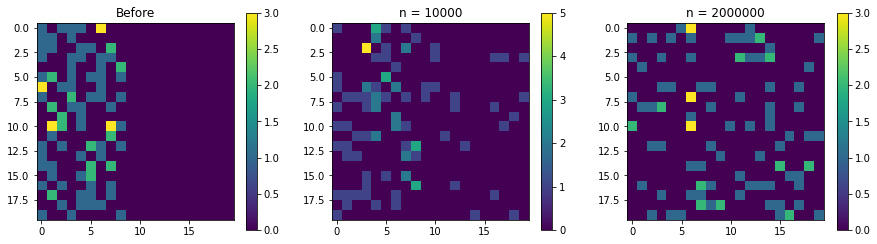

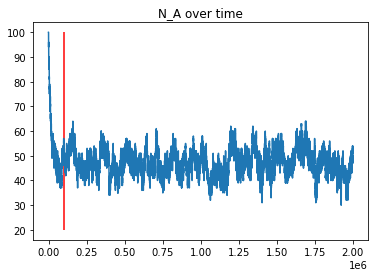

In [3]:
# cell for plots
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(15)

plot = axs[0].imshow(initial)
fig.colorbar(plot, ax = axs[0])
axs[0].set_title("Before")

plot2 = axs[1].imshow(short)
fig.colorbar(plot2, ax = axs[1])
axs[1].set_title("n = 10000")

plot3 = axs[2].imshow(long)
fig.colorbar(plot3, ax = axs[2])
axs[2].set_title("n = 2000000")
plt.show()

fig2 = plt.plot(n_long)
plt.vlines(100000, 20, 100, color = 'red')
plt.title("N_A over time")
plt.show()

Here I hard-coded the fact that we'll take $t_{eq} = 100000$ since it seems to be a reasonable threshold when I ran my simulations (I didn't pick a smaller $t_{eq}$ since I wanted a *guarantee* that we've reached equilibrium). Therefore, the mean and standard deviation will be computed with the array `n_long[100000:]` .

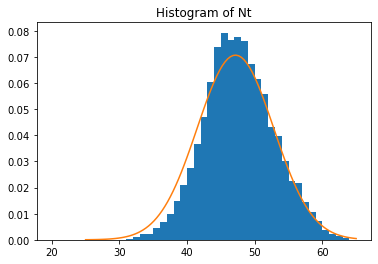

In [4]:
sigma = np.std(n_long[1000000:])
mu = np.mean(n_long[100000:])
# mu = (100/400) * 100

fig3 = plt.hist(n_long[100000:], density=True, bins=np.arange(20, 65, 1))

x_values = np.linspace(25, 65, 100)
y_values = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-1/2 * (x_values - mu)**2/sigma**2)

plt.plot(x_values, y_values)
plt.title("Histogram of Nt")
plt.show()

Unfortunately, since I didn't get a clean expression for problem 5d, there's really no way for me to proceed further with the actual comparison step (I used the statistics to plot the bell curve, so obviously it fits very well). That said, we can calculate what the mean and standard deviation *should* be from a statistical argument, with the assumption that the particles are evenly distributed. Using this assumption, the expression for the mean is:
$$N_A = \frac{N \cdot V_A}{V} = \frac{(100)(180)}{400} \approx 45 $$
This expression is obtained by assuming that every "box" has equal density, so we just multiply that by $V_A$ to get $N_A$. I expect that this is the expected result from 5d as well, but unfortunately I cannot confirm that. Further, we also expect that the standard deviation follows the following form:
$$\sigma = \sqrt{\langle(N_A - \langle N_A \rangle)^2\rangle}$$
This expression comes straight from the problem statement of 5d. Computing these values in the cell below:

In [5]:
print(f"Mean of N_A (data): {np.mean(n_long[100000:])} \n")

print(f"Standard deviation of N_A (data): {sigma}")
print(f"Standard deviation of N_A (formula) {np.sqrt(np.mean((n_long[100000:] - mu)**2))}")

Mean of N_A (data): 47.15079052631579 

Standard deviation of N_A (data): 5.641484570492062
Standard deviation of N_A (formula) 5.118341642030339


Firstly, we see that the mean of $N_A$ from the simulated data matches up almost perfectly with our expected mean from our statistical argument. Further, our standard deviation from the simulated data matches very well with the expected standard deviation of a normal distribution. This result, combined with the gaussian curve (orange) in the histogram provides strong evidence that our $N_A$ indeed follows a Gaussian distribution exactly as we expected, and our numbers match perfectly.

That said, the value for the standard deviation is slightly off from what we expect, but also not too far that it can't just be statistical error. Finally, as another demonstration of the fact that these values indeed do work: 

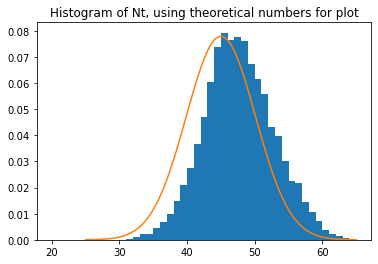

In [6]:
mu_theory = 45
std_theory = np.sqrt(np.mean((n_long[100000:] - mu)**2))

fig3 = plt.hist(n_long[100000:], density=True, bins=np.arange(20, 65, 1))
x_values = np.linspace(25, 65, 100)
y_values = 1/np.sqrt(2*np.pi*std_theory**2) * np.exp(-1/2 * (x_values - mu_theory)**2/std_theory**2)
plt.plot(x_values, y_values)
plt.title("Histogram of Nt, using theoretical numbers for plot")
plt.show()

As expected, when we use the theoretical values for $\langle N_A\rangle$ and $\sigma$, the curve still fits our data very well, therefore confirming that our distirbution is indeed Gaussian. 